In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
import json

from skimage import io
import sys
sys.path.append('../scripts/')
from process_images import framework

In [2]:
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['axes.labelsize'] = 20


In [3]:
N = 3500    # frame_range

with open('../results/28-40_1-4000-analysed.json', 'r') as f:
    t_1, t_er1, S_den1 = [sublist[:N] for sublist in np.transpose(json.load(f))]
with open('../results/28-40_2-4000-analysed.json', 'r') as f:
    t_2, t_er2, S_den2 = [sublist[:N] for sublist in np.transpose(json.load(f))]
with open('../results/28-40_3-4000-analysed.json', 'r') as f:
    t_3, t_er3, S_den3 = [sublist[:N] for sublist in np.transpose(json.load(f))]
with open('../results/28-40_4-4000-analysed.json', 'r') as f:
    t_4, t_er4, S_den4 = [sublist[:N] for sublist in np.transpose(json.load(f))]
with open('../results/28-40_5-4000-analysed.json', 'r') as f:
    t_5, t_er5, S_den5 = [sublist[:N] for sublist in np.transpose(json.load(f))]

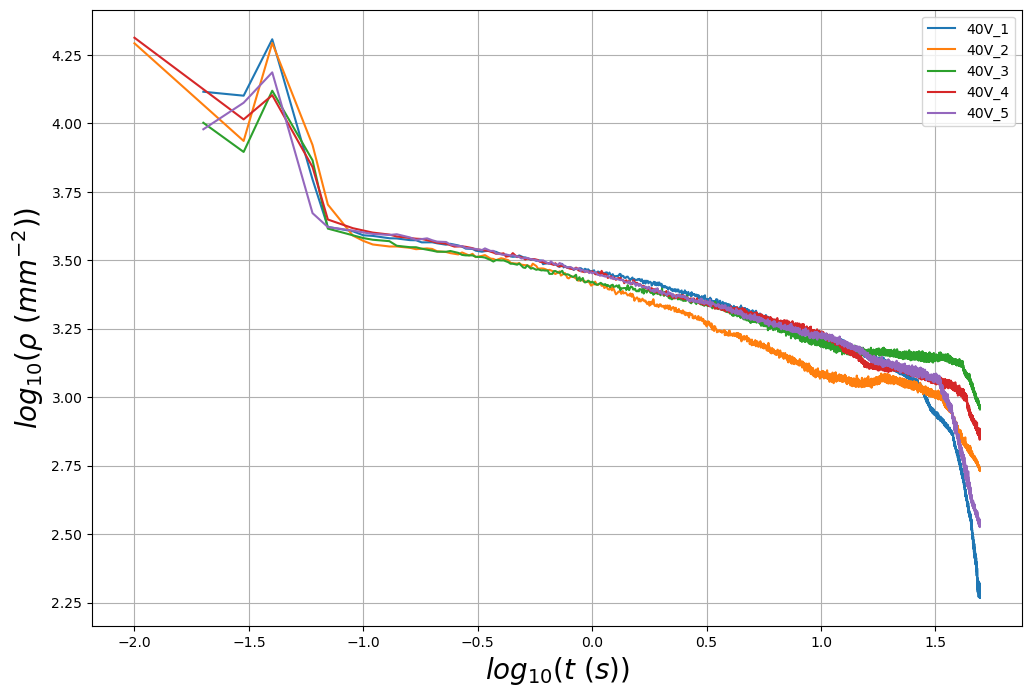

In [4]:
fig = plt.figure(figsize=(12, 8))

plt.plot(np.log10(t_1[:]), np.log10(S_den1[:]), label = '40V_1')
plt.plot(np.log10(t_2[:]), np.log10(S_den2[:]), label = '40V_2')
plt.plot(np.log10(t_3[:]), np.log10(S_den3[:]), label = '40V_3')
plt.plot(np.log10(t_4[:]), np.log10(S_den4[:]), label = '40V_4')
plt.plot(np.log10(t_5[:]), np.log10(S_den5[:]), label = '40V_5')

plt.grid()
plt.xlabel(r'$log_{10}(t\ (s))$')
plt.ylabel(r'$log_{10}(\rho\ (mm^{-2}))$')
plt.legend()
# plt.savefig('../figs/raw-combind-rho_dyn.png')

## Late Time Coarsening Dynamics

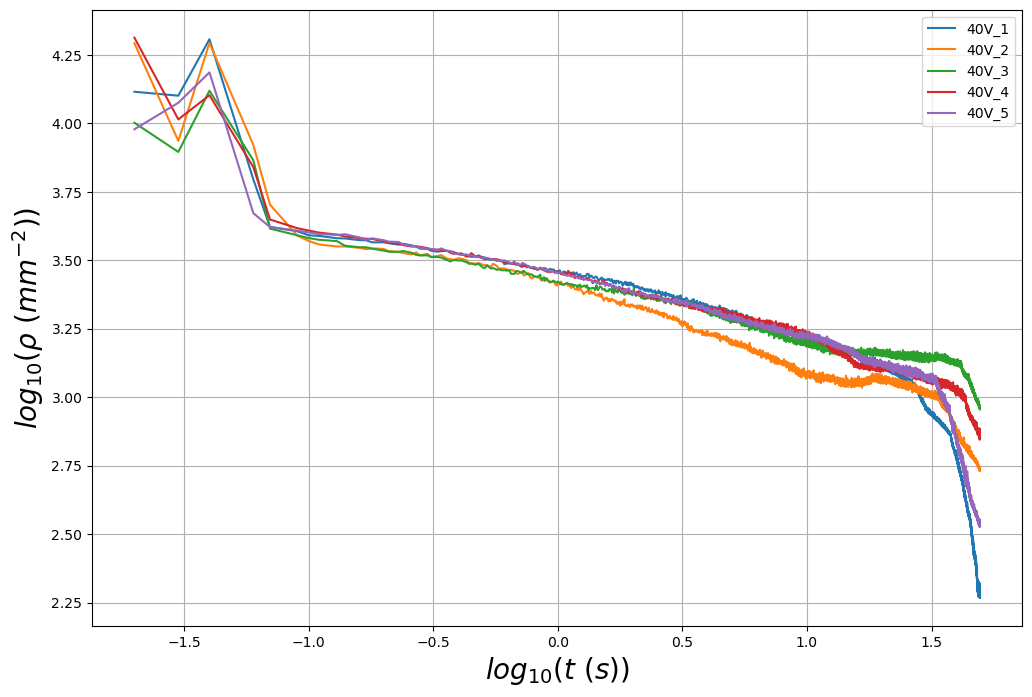

In [5]:
fig = plt.figure(figsize=(12, 8))

t = np.median([t_1, t_2, t_3, t_4, t_5], axis=0)
plt.plot(np.log10(t), np.log10(S_den1), label = '40V_1')
plt.plot(np.log10(t), np.log10(S_den2), label = '40V_2')
plt.plot(np.log10(t), np.log10(S_den3), label = '40V_3')
plt.plot(np.log10(t), np.log10(S_den4), label = '40V_4')
plt.plot(np.log10(t), np.log10(S_den5), label = '40V_5')

plt.grid()
plt.xlabel(r'$log_{10}(t\ (s))$')
plt.ylabel(r'$log_{10}(\rho\ (mm^{-2}))$')
plt.legend()

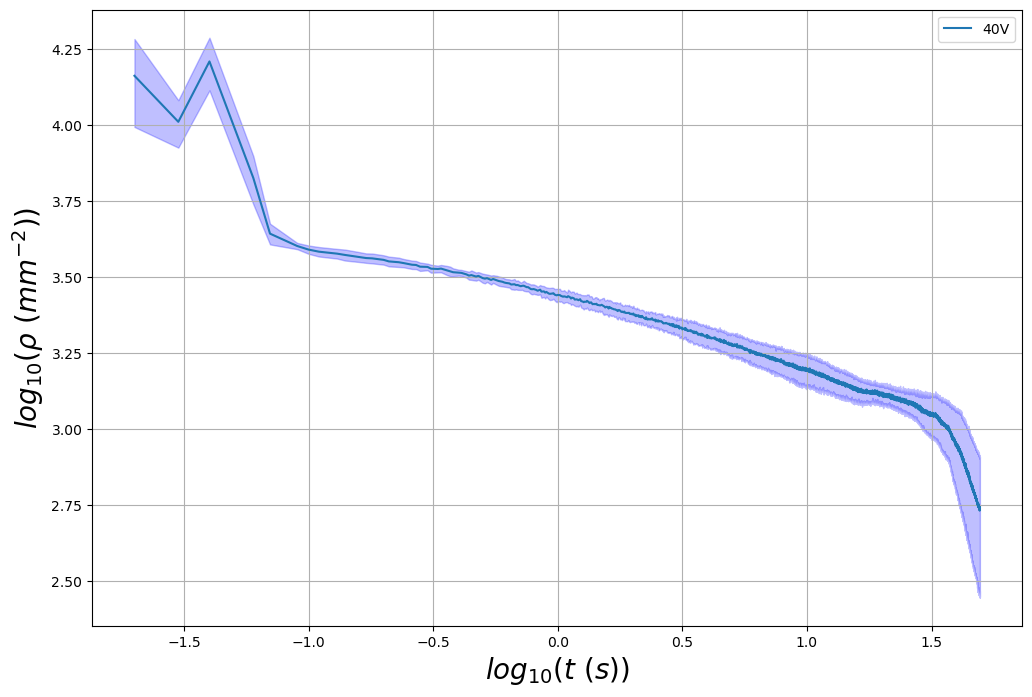

In [6]:
fig = plt.figure(figsize=(12, 8))

S_den_avg = np.array(np.average([S_den1, S_den2, S_den3, S_den4, S_den5], axis=0))
S_den_sd = np.array(np.std([S_den1, S_den2, S_den3, S_den4, S_den5], axis=0))

plt.plot(np.log10(t), np.log10(S_den_avg), label = '40V')

plt.grid()
plt.xlabel(r'$log_{10}(t\ (s))$')
plt.fill_between(np.log10(t), np.log10(S_den_avg-S_den_sd), np.log10(S_den_avg+S_den_sd), color='blue', alpha=0.25)
plt.ylabel(r'$log_{10}(\rho\ (mm^{-2}))$')
plt.legend()

In [7]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)


output_file = '../results/28-40_3500-analysed'

with open('%s.json'%output_file, 'w') as file:
    json.dump([t, S_den_sd, S_den_avg], file, indent=4, cls=NpEncoder)


10 529


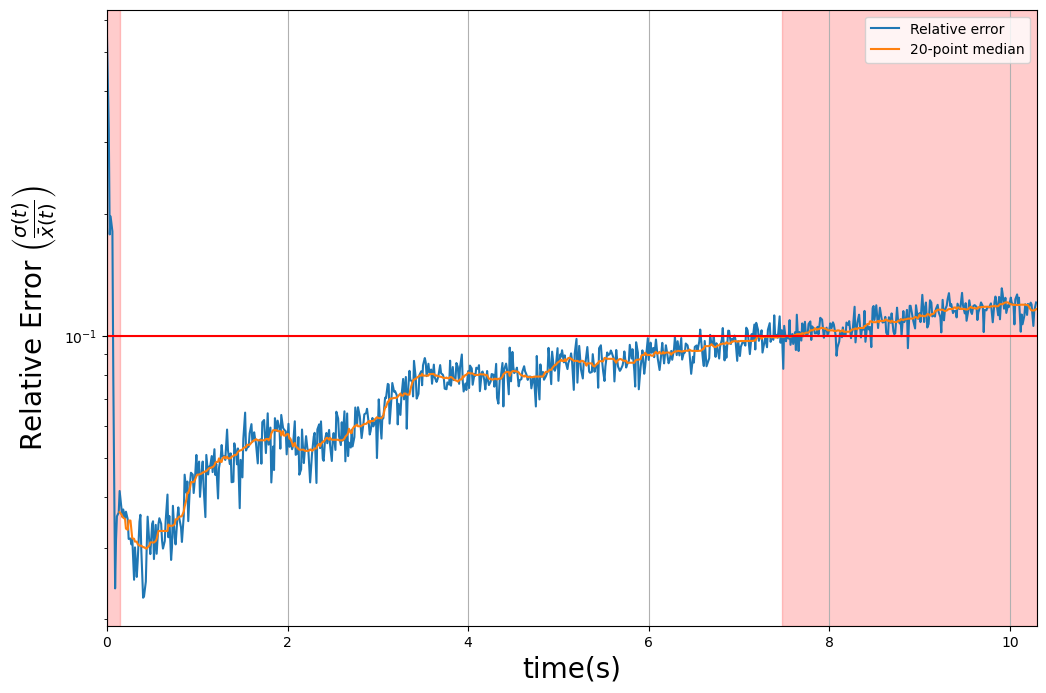

In [8]:
fig = plt.figure(figsize=(12, 8))

ferr_th = 0.1
ferr = S_den_sd/S_den_avg
avg_ferr = np.array([np.median((ferr)[i:i+20]) for i in range(len(ferr) - 20)])
a, b = 10, np.where(avg_ferr[:]>ferr_th)[0][0]

plt.plot(t[0:b+200], (S_den_sd/S_den_avg)[0:b+200], label='Relative error')
plt.plot(t[10:-10][:b+200], avg_ferr[:b+200], label='20-point median')
plt.yscale('log')
plt.xlim([t[0], t[b+200]])
# plt.yticks(np.linspace(min((S_den_sd/S_den_avg)[0:b+200]), max((S_den_sd/S_den_avg)[0:b+200]), 10))  # 10 y-ticks
plt.legend(loc=1)
plt.xlabel('time(s)')
plt.ylabel(r'Relative Error $\left( \frac{\sigma(t)}{\bar{x}(t)}\right)$')
plt.axvspan(xmin=t[b], xmax=t[b+200] , color='red', alpha=0.2, label='Discarded regions')
plt.axvspan(xmin=t[0], xmax=t[a] , color='red', alpha=0.2, label='Discarded regions')
plt.hlines(y= ferr_th, xmin=t[0], xmax=t[b+200],color='red')
plt.grid()
# plt.savefig('../figs/datapoint_selection_criteria.png')
print(a, b)

(array([-0.22390327,  3.43609826]), array([0.04346576]), np.int32(2), array([1.33872505, 0.45586756]), np.float64(1.1524114995609125e-13))


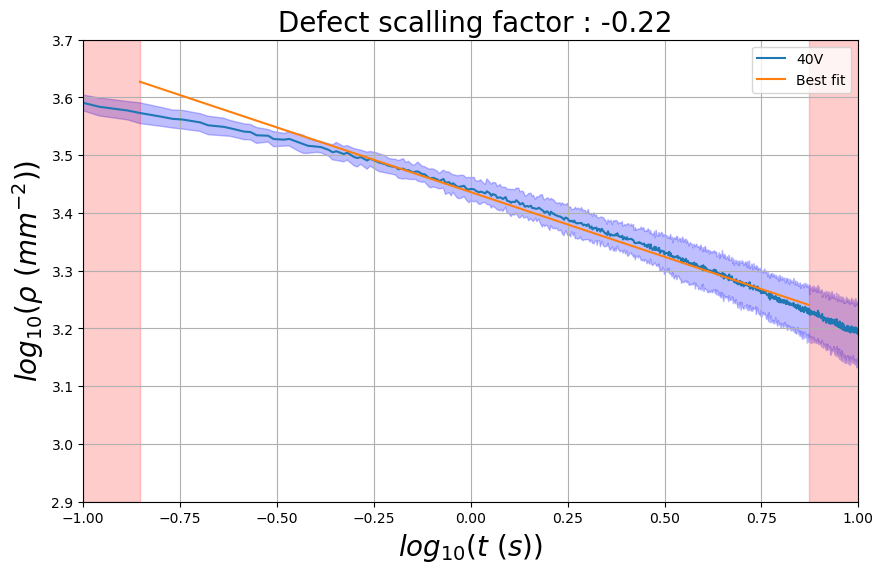

In [9]:
fig = plt.figure(figsize=(10, 6))
plt.tight_layout()
res = np.polyfit(np.log10(t[a:b]), np.log10(1*S_den_avg[a:b]), deg=1, full=True)
print(res)

plt.plot(np.log10(t), np.log10(1*S_den_avg), label ='40V')
plt.plot(np.log10(t[a:b]), res[0][0]*np.log10(t[a:b]) + res[0][1], label='Best fit')

plt.grid()
plt.xlabel(r'$log_{10}(t\ (s))$')
plt.fill_between(np.log10(t), np.log10(S_den_avg-1*S_den_sd), np.log10(S_den_avg+1*S_den_sd), color='blue', alpha=0.25)
plt.axvspan(xmin=-1.7, xmax=np.log10(t[a]), color='red', alpha=0.2)
plt.axvspan(xmin=np.log10(t[b]), xmax=1.5, color='red', alpha=0.2)
plt.xlim([-1, 1])
plt.ylim([2.9, 3.7])
plt.ylabel(r'$log_{10}(\rho\ (mm^{-2}))$')
plt.legend(loc=1)
plt.title(' Defect scalling factor : {:.2f}'.format(res[0][0]))
plt.savefig('../figs/28_new_40V_scalling.png')

(array([-0.05341734, -0.19826937,  3.44289878]), array([0.0028258]), np.int32(3), array([1.63788194, 0.47357489, 0.30507306]), np.float64(1.1524114995609125e-13))


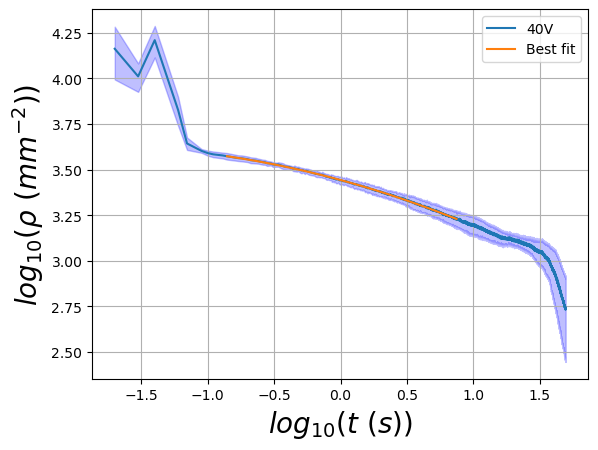

In [10]:

res = np.polyfit(np.log10(t[a:b]), np.log10(S_den_avg[a:b]), deg=2, full=True)
print(res)

plt.plot(np.log10(t), np.log10(S_den_avg), label ='40V')
plt.plot(np.log10(t[a:b]), res[0][0]*np.log10(t[a:b])**2 + res[0][1]*np.log10(t[a:b]) + res[0][2], label='Best fit')

plt.grid()
plt.xlabel(r'$log_{10}(t\ (s))$')
plt.fill_between(np.log10(t), np.log10(S_den_avg-S_den_sd), np.log10(S_den_avg+S_den_sd), color='blue', alpha=0.25)
plt.ylabel(r'$log_{10}(\rho\ (mm^{-2}))$')
plt.legend()

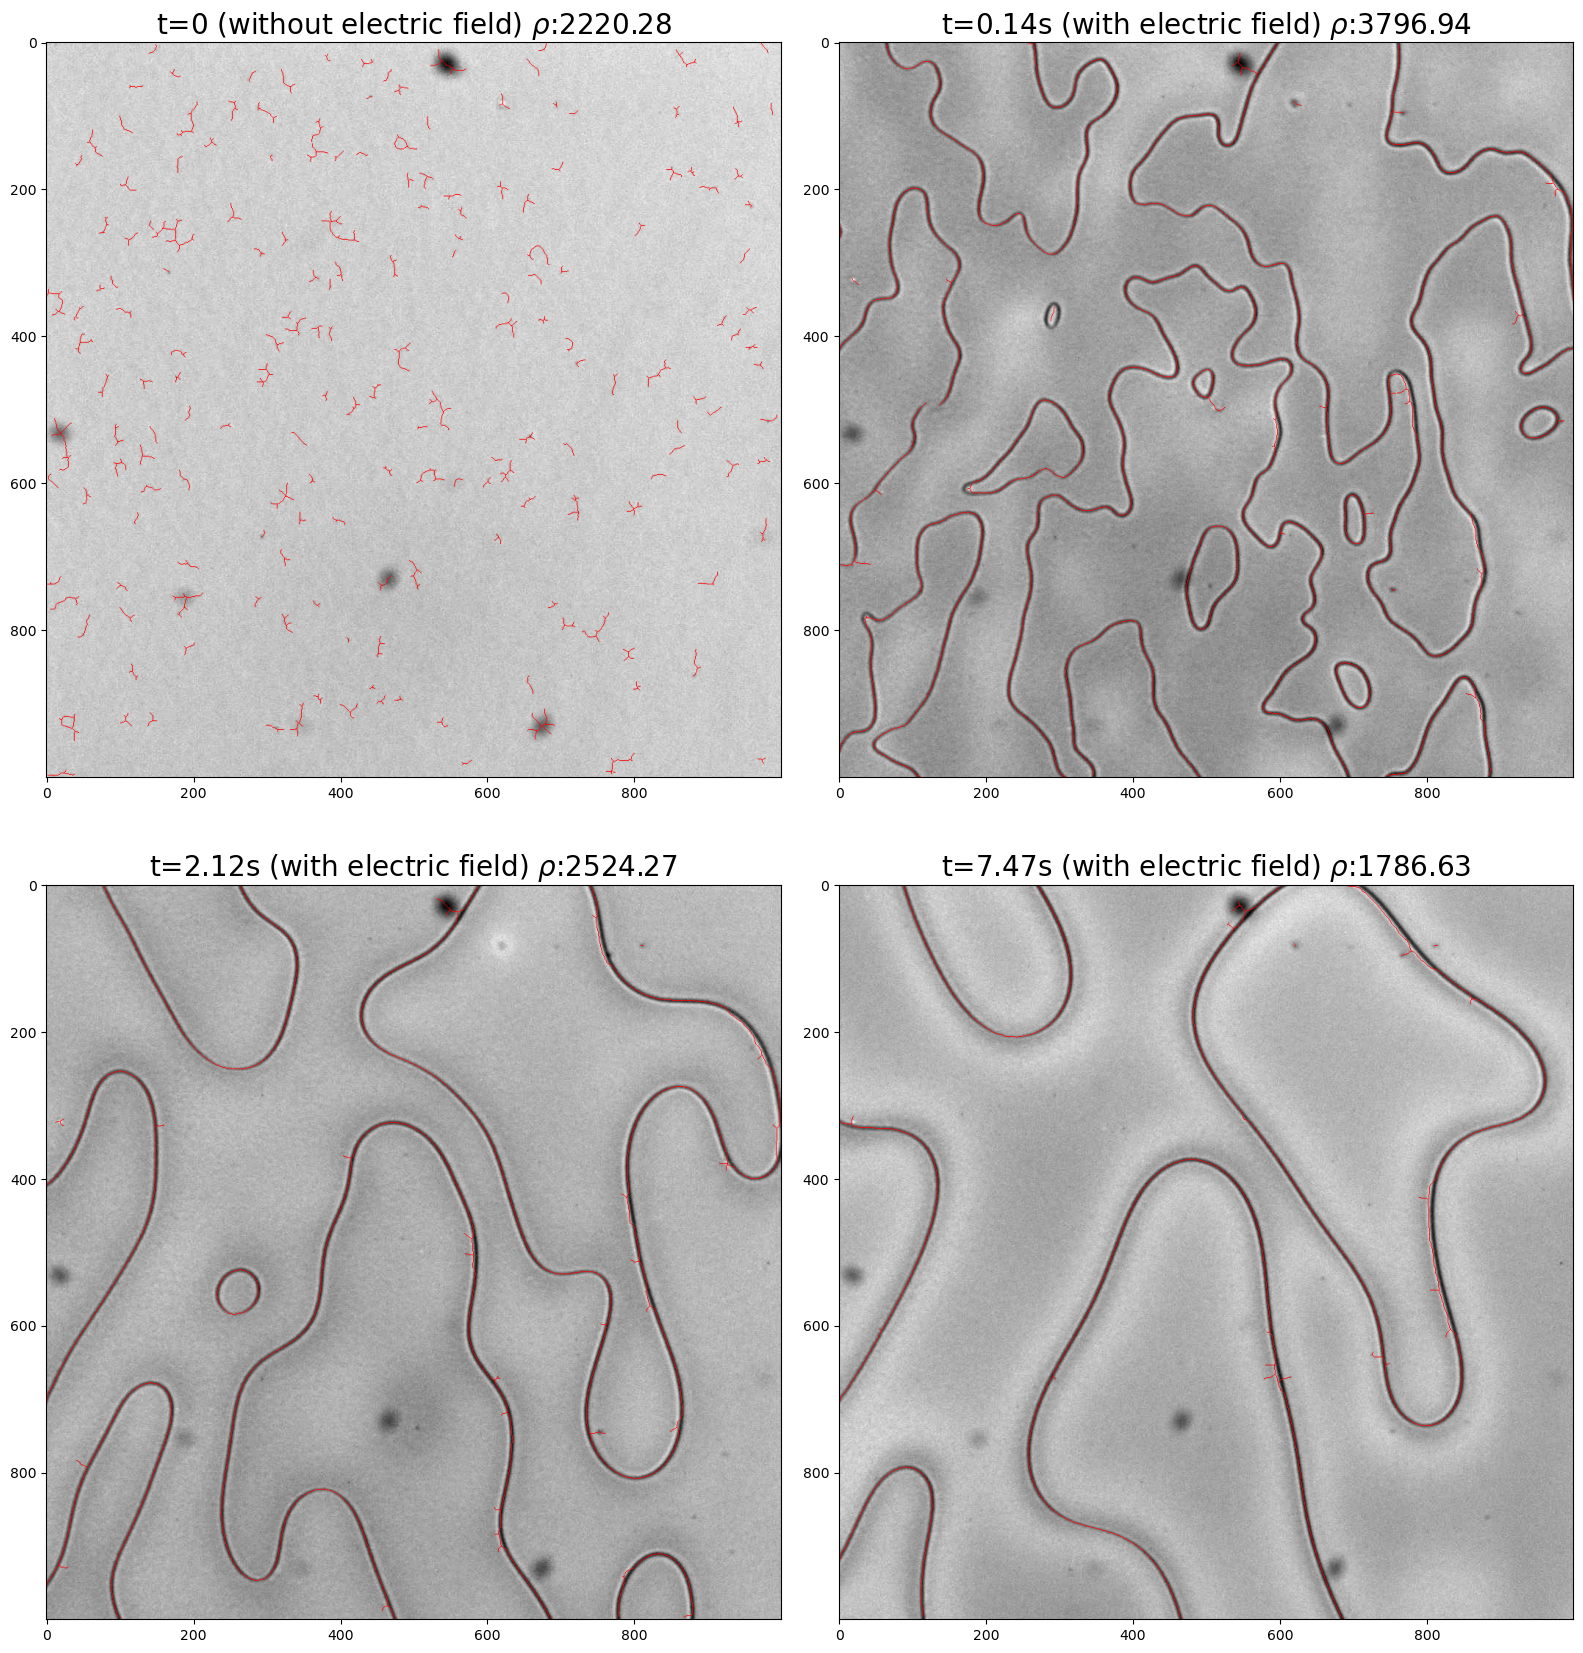

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(16, 17))
ax = axes.flatten()
plt.tight_layout()

frames = 4.09 + np.array([0, a/100,(150)/100, b/100])
den = []
for i in range(len(frames)):
    img0 = io.imread('../exp-data/20251201/28/40_1/{:.2f}s.tif'.format(frames[i]), as_gray=True)
    S_den0, sk0  = framework(img0, hysteresis_th=[0.1, 0.25], closing_footprint=5, skleton_img=True)
    den.append(S_den0)
    
    skeleton0 = sk0.astype(bool)
    img0_norm = (img0 - img0.min()) / (img0.max() - img0.min())
    
    img0_rgb = np.dstack([img0_norm, img0_norm, img0_norm])
    overlay0 = img0_rgb.copy()
    overlay0[skeleton0] = [1.0, 0.0, 0.0]
    ax[i].imshow(overlay0)

ax[0].set_title(r't=0 (without electric field) $\rho$:{:.2f}'.format(den[0]))
ax[1].set_title(r't={:}s (with electric field) $\rho$:{:.2f}'.format(t_1[a], den[1]))
ax[2].set_title(r't={:}s (with electric field) $\rho$:{:.2f}'.format(t_1[150], den[2]))
ax[3].set_title(r't={:}s (with electric field) $\rho$:{:.2f}'.format(t_1[b], den[3]))


plt.savefig('../figs/28_new_40V_dyn.png')

(array([-2.09098748,  6.29119752]), array([0.04639578]), np.int32(2), array([1.41413817, 0.01460262]), np.float64(1.7763568394002505e-13))


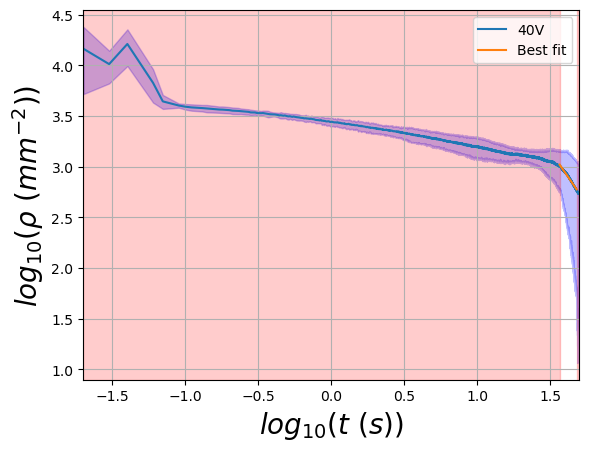

In [12]:
a, b = 2600,3400
res = np.polyfit(np.log10(t[a:b]), np.log10(S_den_avg[a:b]), deg=1, full=True)
print(res)

plt.plot(np.log10(t), np.log10(S_den_avg), label ='40V')
plt.plot(np.log10(t[a:b]), res[0][0]*np.log10(t[a:b]) + res[0][1], label='Best fit')

plt.grid()
plt.xlabel(r'$log_{10}(t\ (s))$')
plt.fill_between(np.log10(t), np.log10(S_den_avg-2*S_den_sd), np.log10(S_den_avg+2*S_den_sd), color='blue', alpha=0.25)
plt.axvspan(xmin=-1.7, xmax=np.log10(t[a]), color='red', alpha=0.2)
plt.axvspan(xmin=np.log10(t[b]), xmax=1.7, color='red', alpha=0.2)
plt.xlim([-1.7, 1.7])
plt.ylabel(r'$log_{10}(\rho\ (mm^{-2}))$')
plt.legend(loc=1)